In [134]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# save model for future use
from sklearn.externals import joblib
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load

# Common imports
import numpy as np
import os
import pandas as pd
# Import seaborn
import seaborn as sns

# Import matplotlib
import matplotlib.pyplot as plt


# to make this notebook's output stable across runs

np.random.seed(42)

# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import accuracy_score, precision_score, recall_score
from random import seed, randint
from sklearn.metrics import f1_score
from scipy.stats import randint

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
import random
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from random import seed, randint
from sklearn.metrics import f1_score
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import StratifiedKFold 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import Imputer 
from sklearn.decomposition import PCA 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, confusion_matrix, recall_score

In [2]:
train_df_2016 = pd.read_csv("train_2016_v2.csv", parse_dates=["transactiondate"])

In [3]:
properties_2016_df = pd.read_csv("properties_2016.csv")

C:\Users\203014767\.conda\envs\DAND\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train_df_2016 = pd.merge(train_df_2016, properties_2016_df, on='parcelid', how='left')

In [5]:
print(len(train_df_2016))

90275


In [6]:
train_df_2017 = pd.read_csv("train_2017.csv", parse_dates=["transactiondate"])

In [7]:
properties_2017_df = pd.read_csv("properties_2017.csv")

C:\Users\203014767\.conda\envs\DAND\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
train_df_2017 = pd.merge(train_df_2017, properties_2017_df, on='parcelid', how='left')

In [9]:
print(len(train_df_2017))

77613


In [10]:
frames = [train_df_2016, train_df_2017]

train_df = pd.concat(frames)

In [11]:
print(len(train_df))

167888


In [12]:
test_df = pd.read_csv("sample_submission.csv")

In [13]:
test_df = test_df.rename(index=str, columns={"ParcelId": "parcelid"})

In [14]:
del train_df_2016, train_df_2017 # dfs still in list
del frames   # memory release now

In [15]:
import gc
gc.collect()

35

In [16]:
frames = [properties_2016_df, properties_2017_df]

properties = pd.concat(frames)

In [17]:
test_df = pd.merge(test_df, properties, on='parcelid', how='left')

In [18]:
del properties_2016_df, properties_2017_df # dfs still in list
del frames   # memory release now
gc.collect()

21

test_df = test_df.drop(['propertyzoningdesc','propertycountylandusecode'], axis = 1)

test_df = test_df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [21]:
joblib.dump(test_df, "test_df_capstone.pkl")

[u'test_df_capstone.pkl']

In [22]:
joblib.dump(train_df, "train_df_capstone.pkl")

[u'train_df_capstone.pkl']

In [97]:
train_df = load("train_df_capstone.pkl")

In [98]:
test_df = load("test_df_capstone.pkl")

In [99]:
print('Train columns with null values:\n', train_df.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', test_df.isnull().sum())
print("-"*10)

Train columns with null values:
 parcelid                             0
logerror                             0
transactiondate                      0
airconditioningtypeid           114100
architecturalstyletypeid        167420
basementsqft                    167795
bathroomcnt                         34
bedroomcnt                          34
buildingclasstypeid             167857
buildingqualitytypeid            60715
calculatedbathnbr                 1832
decktypeid                      166616
finishedfloor1squarefeet        154995
calculatedfinishedsquarefeet       896
finishedsquarefeet12              8369
finishedsquarefeet13            167813
finishedsquarefeet15            161297
finishedsquarefeet50            154995
finishedsquarefeet6             167081
fips                                34
fireplacecnt                    149992
fullbathcnt                       1832
garagecarcnt                    112431
garagetotalsqft                 112431
hashottuborspa                 

In [100]:
data_cleaner = [train_df, test_df]

###COMPLETING: complete or delete missing values in train and test/validation dataset
drop_column = ['airconditioningtypeid','architecturalstyletypeid', 'basementsqft', 'buildingclasstypeid', 'decktypeid', 
               'finishedfloor1squarefeet', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
              'finishedsquarefeet6', 'fireplacecnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 
              'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'regionidneighborhood', 'storytypeid',
              'threequarterbathnbr', 'typeconstructiontypeid', 'yardbuildingsqft17', 'yardbuildingsqft26',
              'numberofstories', 'fireplaceflag', 'taxdelinquencyflag', 'taxdelinquencyyear', 'propertycountylandusecode',
               'propertyzoningdesc']
for dataset in data_cleaner:    
    dataset.drop(drop_column, axis=1, inplace = True)

In [101]:
# Create a Y value to predict for our training set
y = train_df['logerror'].values

In [102]:
drop_column2 = ['logerror', 'transactiondate'] 
train_df.drop(drop_column2, axis=1, inplace = True)


In [104]:
drop_column3 = ['201610', '201611', '201612', '201710', '201711', '201712'] 
test_df.drop(drop_column3, axis=1, inplace = True)


In [75]:
# Let's remove the top and bottom 5% of outliers
outlier_upper = np.percentile(train_df.logerror.values, 95)
outlier_lower = np.percentile(train_df.logerror.values, 5)
train_df['logerror'].ix[train_df['logerror']>outlier_upper] = outlier_upper
train_df['logerror'].ix[train_df['logerror']<outlier_lower] = outlier_lower

In [105]:
print('Train columns with null values:\n', train_df.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', test_df.isnull().sum())
print("-"*10)

Train columns with null values:
 parcelid                            0
bathroomcnt                        34
bedroomcnt                         34
buildingqualitytypeid           60715
calculatedbathnbr                1832
calculatedfinishedsquarefeet      896
finishedsquarefeet12             8369
fips                               34
fullbathcnt                      1832
heatingorsystemtypeid           62237
latitude                           34
longitude                          34
lotsizesquarefeet               18442
propertylandusetypeid              34
rawcensustractandblock             34
regionidcity                     3309
regionidcounty                     34
regionidzip                       119
roomcnt                            34
unitcnt                         58832
yearbuilt                        1060
structuretaxvaluedollarcnt        529
taxvaluedollarcnt                  36
assessmentyear                     34
landtaxvaluedollarcnt              37
taxamount        

num = train_df.select_dtypes(exclude=[object])
num = num.columns.get_values()
num.tolist()

cat = train_df.select_dtypes(include=[object])
cat = cat.columns.get_values()
cat.tolist()

In [149]:
train_df.describe()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,...,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
count,1.678880e+05,167854.000000,167854.000000,107173.000000,166056.000000,166992.000000,159519.000000,167854.000000,166056.000000,105651.000000,...,167769.000000,167854.000000,109056.000000,166828.000000,1.673590e+05,1.678520e+05,167854.000000,1.678510e+05,167843.000000,1.670020e+05
mean,1.299536e+07,2.288265,3.041739,6.015461,2.312542,1778.630246,1752.326939,6048.844484,2.245345,3.924525,...,96586.390722,1.477480,1.110365,1968.569311,1.843460e+05,4.726833e+05,2015.462181,2.888805e+05,5989.515575,6.049390e+13
std,3.016071e+06,1.000835,1.149134,1.882799,0.977808,940.356025,921.360898,20.702187,0.964703,3.642599,...,3723.009458,2.821496,0.988168,23.777202,2.192841e+05,6.028372e+05,0.498569,4.456451e+05,7214.731946,1.054137e+12
min,1.071174e+07,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,6037.000000,1.000000,1.000000,...,95982.000000,0.000000,1.000000,1824.000000,4.400000e+01,2.200000e+01,2015.000000,2.200000e+01,19.920000,6.037101e+13
25%,1.154899e+07,2.000000,2.000000,4.000000,2.000000,1183.000000,1172.000000,6037.000000,2.000000,2.000000,...,96193.000000,0.000000,1.000000,1953.000000,8.256800e+04,2.026522e+05,2015.000000,8.373000e+04,2798.070000,6.037312e+13
50%,1.254060e+07,2.000000,3.000000,7.000000,2.000000,1541.000000,1520.000000,6037.000000,2.000000,2.000000,...,96389.000000,0.000000,1.000000,1970.000000,1.340510e+05,3.500000e+05,2015.000000,1.977760e+05,4501.040000,6.037604e+13
75%,1.421930e+07,3.000000,4.000000,7.000000,3.000000,2103.000000,2065.000000,6059.000000,3.000000,7.000000,...,96987.000000,0.000000,1.000000,1987.000000,2.142570e+05,5.540020e+05,2016.000000,3.553340e+05,6914.165000,6.059042e+13
max,1.676893e+08,20.000000,16.000000,12.000000,20.000000,35640.000000,21929.000000,6111.000000,20.000000,24.000000,...,399675.000000,18.000000,237.000000,2016.000000,1.142179e+07,4.906124e+07,2016.000000,4.895220e+07,586639.300000,4.830301e+14


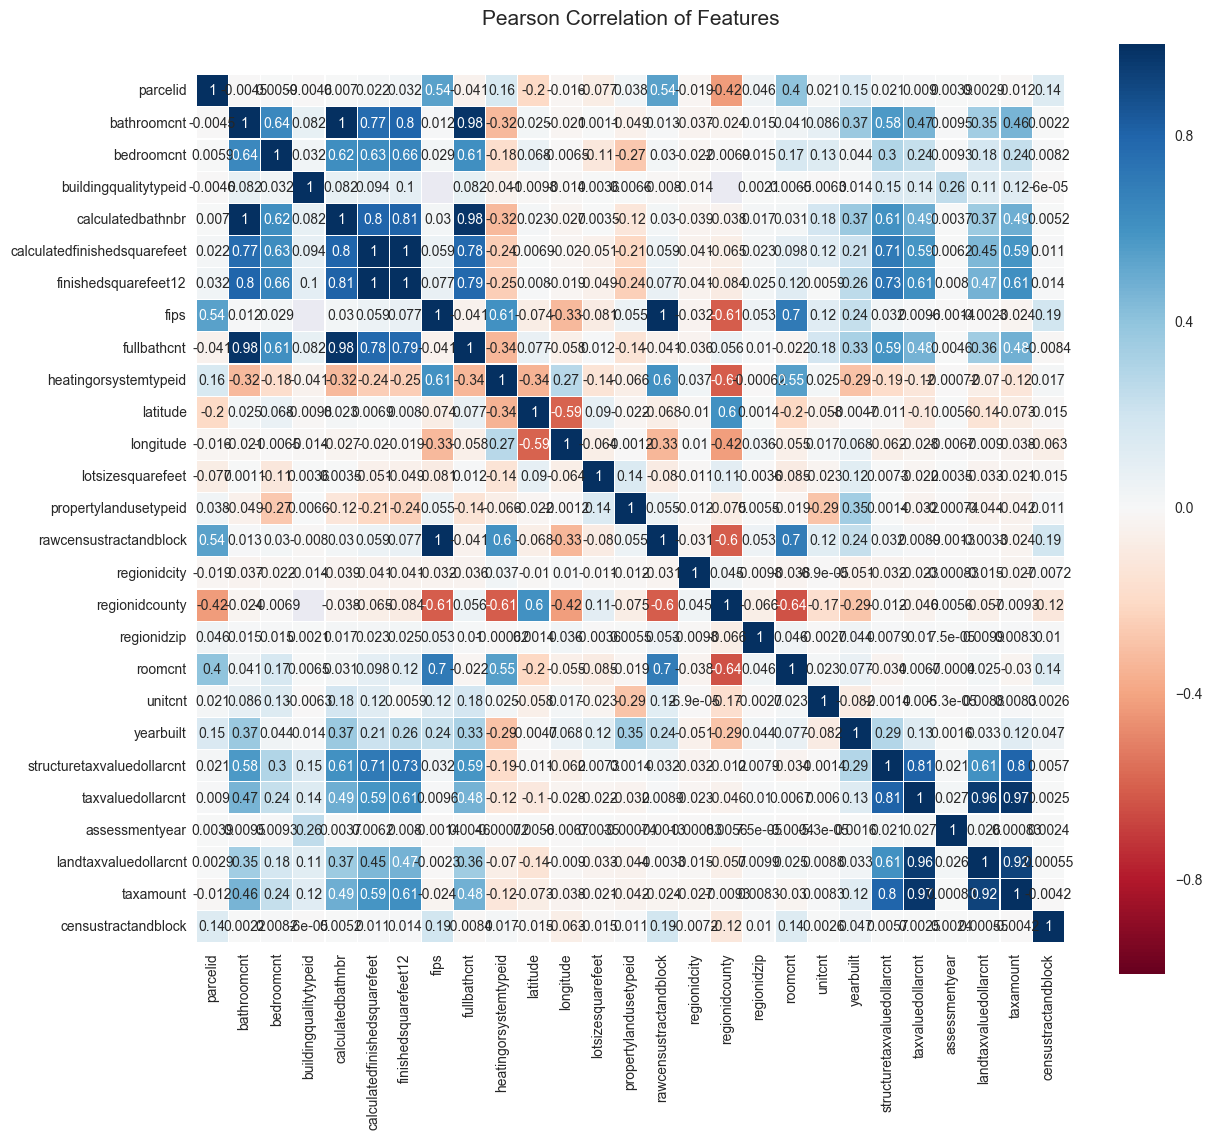

In [150]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

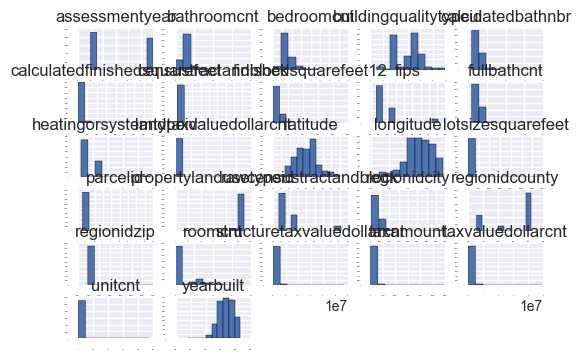

In [151]:
train_df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

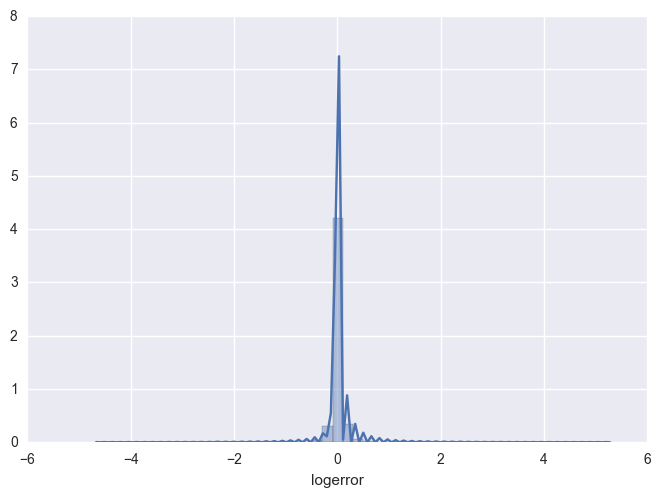

In [36]:
# Print the summary statistics for income
#print(income.describe())

# Plot a basic histogram of income per capita
sns.distplot(train_df['logerror'],hist=True, kde = True)

# Show the plot
plt.show()

# Plot a rugplot
#sns.distplot(train_df['logerror'], kde = True, rug = False)

# Show the plot
#plt.show()

In [110]:
# Create boxplot
sns.boxplot(x='logerror', data=train_df)

# Show the plot
plt.show()

# Close the plot
plt.close()

# Create swarmplot
sns.swarmplot(x='logerror', data=train_df)

# Show the plot
plt.show()

ValueError: Could not interpret input 'logerror'

### Prepare the data for Machine Learning algorithms

In [132]:
X_train, X_test, y_train, y_test = train_test_split = \
    train_test_split(train_df, y, test_size=0.2, random_state=42)

TypeError: 'list' object is not callable

In [184]:
#Assumptions
my_imputer = Imputer()
kfold = KFold(n_splits=5, random_state=seed)
num_folds = 3
scoring = 'neg_mean_absolute_error'
seed = 7
trees = 10
scaler = MinMaxScaler(feature_range=(0, 1))
depth = 5
start = True

#algorithms
LR_clf = LinearRegression()
LASSO_clf = Lasso()
KNN_clf = KNeighborsRegressor()
RF_clf = RandomForestRegressor(random_state = 7, n_estimators = trees, max_depth = depth,  warm_start=start)
GB_clf = GradientBoostingRegressor(random_state = 7, n_estimators= trees, max_depth = depth, warm_start = start)
PCA = PCA(n_components=9)
skb = SelectKBest(k=6)

features = []
features.append(('pca', PCA))
features.append(('select_best', skb))
feature_union = FeatureUnion(features)

In [127]:
X_train = my_imputer.fit_transform(X_train)
X_test = my_imputer.transform(X_test)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [176]:
# scale data between 0 and 1
scaler.fit(X_train)
X_train_scaled =scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [190]:
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
#estimators.append(('clf', LASSO_clf))
pipeline = Pipeline(estimators)
param_grid = {
    'feature_union__pca__n_components': randint(low=2, high=10),
    'feature_union__select_best__k': randint(low=2, high=15)
        }
r_search_pca_skb = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=4,random_state=7, 
                                      scoring = scoring, cv = kfold)
r_search_pca_skb.fit(X_train_scaled, y_train)
#print(r_search_pca_skb.best_score_)
#print(r_search_pca_skb.best_estimator_)
print(r_search_pca_skb.best_params_)

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator Pipeline(memory=None,
     steps=[(u'feature_union', FeatureUnion(n_jobs=1,
       transformer_list=[(u'pca', PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), (u'select_best', SelectKBest(k=6, score_func=<function f_classif at 0x00000000DBFD3B38>))],
       transformer_weights=None))]) does not.

In [193]:
#pipeline
num_attribs = list(X_train)
prep_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),        
        ("feature_union",feature_union)
])

In [194]:
X_train_prepared = prep_pipeline.fit_transform(X_train,y_train)
#train_df_prepared

print('Train columns with null values:\n', X_train.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', X_test.isnull().sum())
print("-"*10)

In [ ]:
# Tune scaled KNN
neighbors = [1,2,3,4,5,7,8,9,10]
param_grid = dict(n_neighbors=neighbors)
grid = GridSearchCV(KNN_clf, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train_prepared, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
KNN_clf_tuned = grid.best_estimator_

In [ ]:
#Tune RF
param_grid = {
    'max_depth' : randint(low=1, high=5),
    'min_samples_split': randint(low=2, high=5),
    'n_estimators' : randint(low=100, high=200) }

rsearch = RandomizedSearchCV(RF_clf, param_distributions=param_grid, n_iter=25, cv = kfold, 
                             random_state=7, scoring = scoring)
rsearch_result = rsearch.fit(X_train_prepared y_train)
#print(rsearch.best_score_)
#print(rsearch.best_estimator_)
#print(rsearch.best_params_)

print("Best: %f using %s" % (rsearch_result.best_score_, rsearch_result.best_params_))
RF_clf_tuned = rsearch_result.best_estimator_

In [ ]:
# Tune GB - First tune number of Trees
param_grid = {#'learning_rate' : uniform(), 
'max_depth' : [2, 4, 6, 8],
#'subsample': uniform(),            
'n_estimators' : range(50, 400, 50) }

grid_search = GridSearchCV(GB_clf, param_grid=param_grid, cv = kfold, scoring = scoring)
grid_result = grid_search.fit(X_train_prepared, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
GB_clf_tuned = grid_search.best_estimator_
#print(rsearch.best_score_)
#print(rsearch.best_estimator_)
#print(rsearch.best_params_)

#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#GB_clf_tuned = grid_result.best_estimator_

In [152]:

models = []
models.append(('LR', LR_clf))
models.append(('Lasso', LASSO_clf))
models.append(('KNN', KNN_clf))
models.append(('RF',RF_clf))
models.append(('GB', GB_clf))

results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\203014767\.conda\envs\DAND\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\203014767\.conda\envs\DAND\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\203014767\.conda\envs\DAND\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\203014767\.conda\envs\DAND\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_we

LR: -0.069449 (0.001127)


C:\Users\203014767\.conda\envs\DAND\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\203014767\.conda\envs\DAND\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\203014767\.conda\envs\DAND\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\203014767\.conda\envs\DAND\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_we

Lasso: -0.069266 (0.001082)


C:\Users\203014767\.conda\envs\DAND\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\203014767\.conda\envs\DAND\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\203014767\.conda\envs\DAND\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\203014767\.conda\envs\DAND\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_we

KNN: -0.085259 (0.000498)


C:\Users\203014767\.conda\envs\DAND\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\203014767\.conda\envs\DAND\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\203014767\.conda\envs\DAND\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\203014767\.conda\envs\DAND\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_we

RF: -0.076762 (0.000757)


C:\Users\203014767\.conda\envs\DAND\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\203014767\.conda\envs\DAND\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\203014767\.conda\envs\DAND\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\203014767\.conda\envs\DAND\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_we

GB: -0.069109 (0.000728)


C:\Users\203014767\.conda\envs\DAND\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


In [153]:
#Scaled

pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', scaler),('LR',LR_clf)])))
pipelines.append(('Lasso', Pipeline([('Scaler', scaler),('Lasso',LASSO_clf)])))
pipelines.append(('KNN', Pipeline([('Scaler', scaler),('KNN',KNN_clf)])))
pipelines.append(('RF', Pipeline([('Scaler', scaler),('RF',RF_clf)])))
pipelines.append(('GB', Pipeline([('Scaler', scaler),('GB', GB_clf)])))
results_sss = []
names_sss = []
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results_sss.append(cv_results)
    names_sss.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

NameError: name 'sss' is not defined

In [185]:
# scaled/pca/skb
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', scaler),("feature_union",feature_union),('LR',LR_clf)])))
pipelines.append(('Lasso', Pipeline([('Scaler', scaler),("feature_union",feature_union),('Lasso',LASSO_clf)])))
pipelines.append(('KNN', Pipeline([('Scaler', scaler),("feature_union",feature_union),('KNN',KNN_clf)])))
pipelines.append(('RF', Pipeline([('Scaler', scaler),("feature_union",feature_union),('RF',RF_clf)])))
pipelines.append(('GB', Pipeline([('Scaler', scaler),("feature_union",feature_union),('GB', GB_clf)])))

results_pca_tuned = []
names_pca_tuned = []
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results_pca_tuned.append(cv_results)
    names_pca_tuned.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.069260 (0.000750)
Lasso: -0.069227 (0.000696)
KNN: -0.085135 (0.001054)
RF: -0.069302 (0.000661)
GB: -0.069191 (0.000701)


In [ ]:
# scaled/pca/skb/tuned
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', scaler),("feature_union",feature_union),('LR',LR_clf)])))
pipelines.append(('Lasso', Pipeline([('Scaler', scaler),("feature_union",feature_union),('Lasso',LASSO_clf)])))
pipelines.append(('KNN', Pipeline([('Scaler', scaler),("feature_union",feature_union),('KNN',KNN_clf_tuned)])))
pipelines.append(('RF', Pipeline([('Scaler', scaler),("feature_union",feature_union),('RF',RF_clf_tuned)])))
pipelines.append(('GB', Pipeline([('Scaler', scaler),("feature_union",feature_union),('GB', GB_clf_tuned)])))

results_pca_tuned = []
names_pca_tuned = []
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results_pca_tuned.append(cv_results)
    names_pca_tuned.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

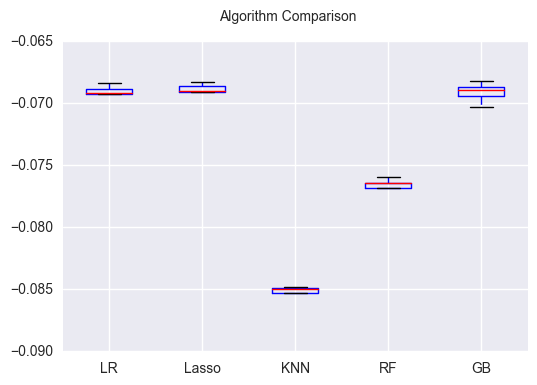

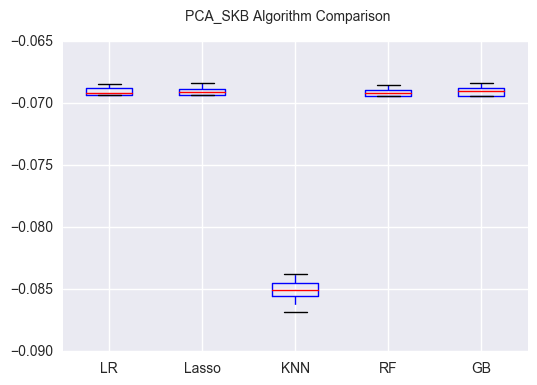

In [186]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Compare Algorithms
fig_pca_tuned = plt.figure()
fig_pca_tuned.suptitle('PCA_SKB Algorithm Comparison')
ax = fig_pca_tuned.add_subplot(111)
plt.boxplot(results_pca_tuned)
ax.set_xticklabels(names_pca_tuned)
plt.show()

### Final Predictions

In [ ]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', prep_pipeline),
    ('rf_reg', final_model_rf)
])

In [159]:
best_param = load("best_param_zillow6.pkl")
print (best_param)

{u'KBest__k': 21, u'pca__n_components': 7, u'reg__min_samples_split': 83}


In [122]:
# Run final predictions
RF_rand_final_predictions_test = final_predictor.predict(test_df)

In [123]:
submission_file = pd.read_csv('sample_submission.csv') 
for column in submission_file.columns[submission_file.columns != 'ParcelId']:
    submission_file[column] = RF_rand_final_predictions_test

In [124]:
submission_file.to_csv('RF_final_predictions.csv', index=False, float_format='%.4f')